In [2]:
import numpy as np
import matplotlib.pyplot as plt

from buffon_needle import pi_buffon_needle
from buffon_needle import buffon_needle_random

g:\Mi unidad\PKM\Master Tecnologías físicas\optimización en sistemas físicos y aplicaciones industriales\Optimization Algorithms\2 Números aleatorios, Métodos de Montecarlo\Aguja de Buffon\buffon_needle.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  pi_aux = 2 * d / (p * l)


[3.96  2.97  2.64  ... 3.156 3.123 3.22 ]
[3.96  2.97  2.64  ... 3.156 3.123 3.22 ]


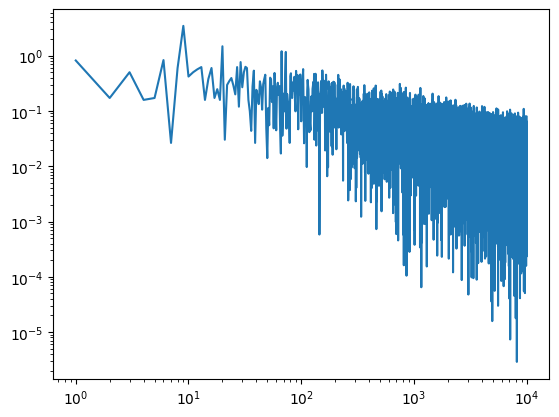

In [204]:
# Realizamos 
pi, err = buffon_needle_random(0.99, 1, 10000)

print(np.round([i for i in pi if i !=np.infty],3))
print(np.round([i for i in pi if i !=np.infty],3))

plt.loglog(err)
plt.show()

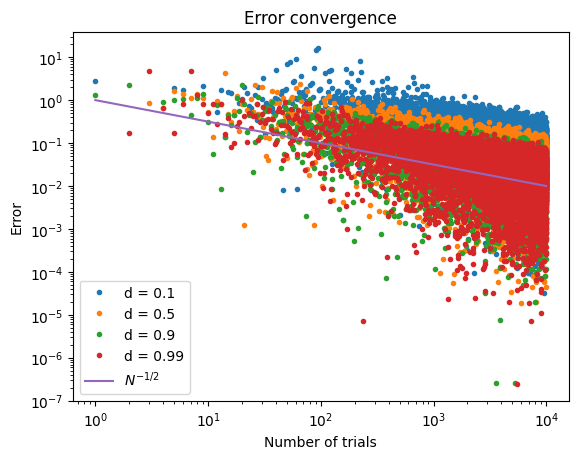

In [209]:
# Realizamos la simulación para 10000 agujas
# Con distintos tamaños de aguja

lista = [0.1, 0.5, 0.9, 0.99]

for d in lista:
    pi, err = buffon_needle_random(d, 1, 10000)
    y = err
    plt.loglog(err,'.', label='d = '+str(d))
    plt.xlabel('Number of trials')
    plt.ylabel('Error')
    plt.title('Error convergence')


plt.plot(np.arange(1,len(err)), np.arange(1,len(err))**(-0.5), label='$N^{-1/2}$')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()


In [181]:
# Vamos a estudiar el orden de convergencia del método
# Para ello vamos a realizar varias simulaciones, ajustando una recta
# al error en doble logaritmico y calculando la pendiente tenemos el orden de convergencia.
ex = []
for _ in range(10):
    # Realizamos la simulación para 10000 agujas con d = 0.99
    pi, err = buffon_needle_random(0.99, 1, 10000)
    y = err
    x = np.array(np.arange(1, len(err)+1))
    
    xlog = np.log(x)
    p = np.polyfit(xlog, np.log(y),1)
    if  not np.isnan(p[0]): # Algunos puntos no convergen, por lo que no podemos ajustar una recta, eliminamos esas iteraciones
        ex.append(p[0])
print(ex)

g:\Mi unidad\PKM\Master Tecnologías físicas\optimización en sistemas físicos y aplicaciones industriales\Optimization Algorithms\2 Números aleatorios, Métodos de Montecarlo\Aguja de Buffon\buffon_needle.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  pi_aux = 2 * d / (p * l)


[-0.5003873708154177, -0.4865884316763966, -0.5151865357779569, -0.5076760612254809, -0.5000662377810395]


In [182]:
co = np.mean(ex)
dist = np.std(ex)
print(f'El algoritmo converge polinómicamente con un orden de {co}+-{dist}')

El algoritmo converge polinómicamente con un orden de -0.5019809274552584+-0.00948637997814206


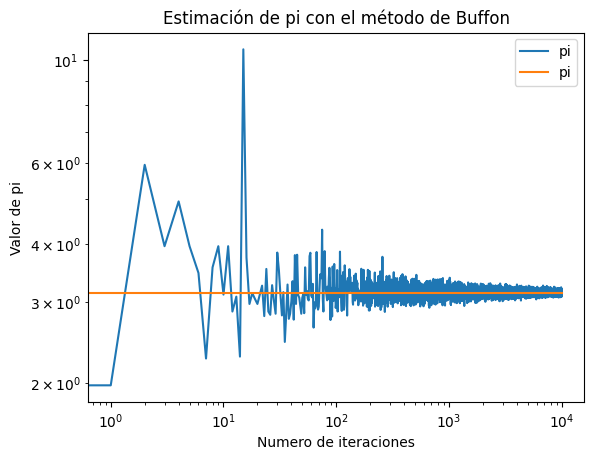

In [18]:
# Vamos a representar la evolución del valor de pi para tenerla.
plt.plot(pi, '-', label='pi')
plt.plot([0, len(pi)], [np.pi, np.pi],label='pi')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Estimación de pi con el método de Buffon')
plt.xlabel('Numero de iteraciones')
plt.ylabel('Valor de pi')
plt.show()

# vamos a ver la convergencia generando las agujas de una en una.

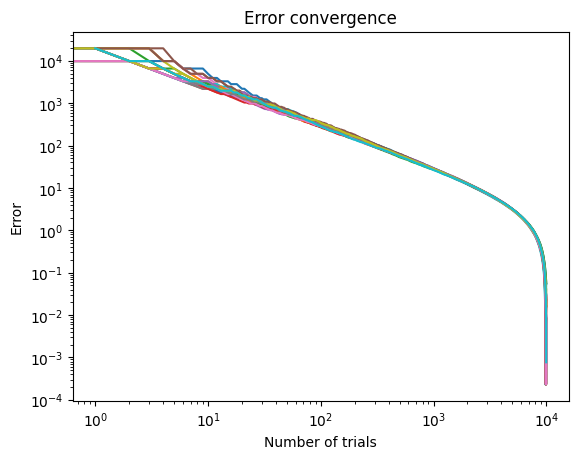

In [23]:
ex = []
for i in range(20):
    pi, err, pi_acum, err_acum = pi_buffon_needle(0.99, 1, 10000)
    plt.loglog(err_acum, label='d = '+str(0.99))
    plt.xlabel('Number of trials')
    plt.ylabel('Error')
    plt.title('Error convergence')
    p = np.polyfit(np.log(np.arange(1,len(err_acum)+1)), np.log(err_acum),1)
    ex.append(p[0])
plt.show()

In [21]:
co = np.mean([i for i in ex if not np.isnan(i)])
err = np.std([i for i in ex if not np.isnan(i)])
print(f'El algoritmo converge polinómicamente con un orden de {co}+-{err}')

El algoritmo converge polinómicamente con un orden de -1.6389487676550278+-0.0329864064429023
